This notebook shows how different results from `convolve` and `convolve_fft` can be.

In [1]:
import numpy as np
from skimage.io import imread
import pyclesperanto_prototype as cle

cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

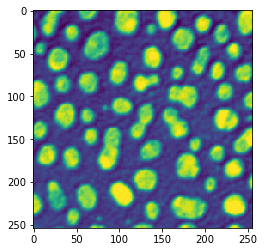

In [2]:
image = cle.push(imread('../../data/blobs.tif'))
cle.imshow(image)

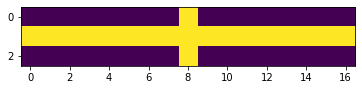

In [3]:
psf = cle.push(np.asarray([
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
]))
cle.imshow(psf)

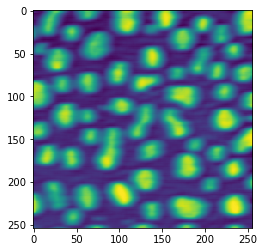

In [4]:
result = cle.convolve(image, psf)

cle.imshow(result)

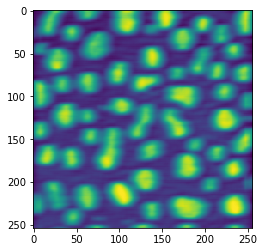

In [5]:
result2 = cle.convolve_fft(image, psf)

cle.imshow(result2)

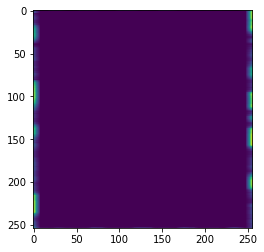

In [6]:
difference = result - result2

cle.imshow(difference)

In [7]:
import timeit

In [8]:
%timeit result2 = cle.convolve_fft(image, psf)

4.61 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%timeit result = cle.convolve(image, psf)

635 µs ± 6.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
image = cle.push(np.random.random((512,512,50)))
psf = cle.push(np.random.random((21, 21, 11)))

In [11]:
%timeit result2 = cle.convolve_fft(image, psf)

393 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit result = cle.convolve(image, psf)

1.48 s ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
